In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator as op
import time
import copy
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.drop("Unnamed: 0", axis = 1, inplace=True)

In [4]:
df_train

,User_ID,Personal,Theme,Discussion_day,comment_day,Participant_Type,Successful_Submission_Count,Comp_participation_day,FeatureA,FeatureB,...,Function_DM,Function_Bus,Function_AI,Function_ML,count_UA,Day_duration,FeatureX,FeatureY,User_sign-in_day,Active
0,ID_000H9XOP,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000004,0.161290,0.0,0.333333,0.709677,0
1,ID_004UKSJV,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000008,0.048387,0.0,0.000000,0.903226,0
2,ID_008D2J6C,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000007,0.290323,0.0,0.000000,0.225806,1
3,ID_00ETFE7J,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000007,0.322581,0.0,0.000000,0.193548,1
4,ID_00RKDLAX,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000007,0.032258,0.0,0.333333,0.741935,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9657,ID_ZZHDXC1Q,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000005,0.032258,0.0,0.000000,0.870968,0
9658,ID_ZZJKFBR5,-1.0,0.0,0.0,0.0,1.0,0.0,0.258065,0.1250,0.0625,...,0.0,0.0,0.0,0.0,0.000030,0.064516,0.0,0.333333,0.258065,0
9659,ID_ZZQK0LU6,-1.0,0.0,0.0,0.0,1.0,0.0,0.935484,0.1875,0.0000,...,0.0,0.0,0.0,0.0,0.000087,0.064516,0.0,1.000000,0.935484,0
9660,ID_ZZUNZJ2U,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000008,0.032258,0.0,0.000000,0.967742,0


In [5]:
df_temp = df_train.copy()

In [ ]:
# df_temp["ID"] = df_temp["User_ID"].str[0:11]

In [ ]:
# df_temp["ID"].unique()

In [6]:
df_temp

,User_ID,Personal,Theme,Discussion_day,comment_day,Participant_Type,Successful_Submission_Count,Comp_participation_day,FeatureA,FeatureB,...,Function_DM,Function_Bus,Function_AI,Function_ML,count_UA,Day_duration,FeatureX,FeatureY,User_sign-in_day,Active
0,ID_000H9XOP,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000004,0.161290,0.0,0.333333,0.709677,0
1,ID_004UKSJV,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000008,0.048387,0.0,0.000000,0.903226,0
2,ID_008D2J6C,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000007,0.290323,0.0,0.000000,0.225806,1
3,ID_00ETFE7J,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000007,0.322581,0.0,0.000000,0.193548,1
4,ID_00RKDLAX,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000007,0.032258,0.0,0.333333,0.741935,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9657,ID_ZZHDXC1Q,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000005,0.032258,0.0,0.000000,0.870968,0
9658,ID_ZZJKFBR5,-1.0,0.0,0.0,0.0,1.0,0.0,0.258065,0.1250,0.0625,...,0.0,0.0,0.0,0.0,0.000030,0.064516,0.0,0.333333,0.258065,0
9659,ID_ZZQK0LU6,-1.0,0.0,0.0,0.0,1.0,0.0,0.935484,0.1875,0.0000,...,0.0,0.0,0.0,0.0,0.000087,0.064516,0.0,1.000000,0.935484,0
9660,ID_ZZUNZJ2U,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,...,0.0,0.0,0.0,0.0,0.000008,0.032258,0.0,0.000000,0.967742,0


In [ ]:
# for i in range(len(df_temp)-1):
#     if (df_temp.loc[i, "ID"] == df_temp.loc[i+1, "ID"]) & (df_temp.loc[i+1, "Active"] == 1):
#         df_temp.loc[i, "Next Month Active"] = 1
#     else:
#         df_temp.loc[i, "Next Month Active"] = 0

In [ ]:
# df_temp['Next Month Active'].fillna(0, inplace = True)

In [ ]:
# df_temp[df_temp["Next Month Active"]==1].shape[0]

In [ ]:
# y = df_temp["Next Month Active"]

In [7]:
df_train.drop("User_ID", axis = 1, inplace=True)

In [ ]:
# df_train.drop("Active", axis = 1, inplace=True)

In [8]:
df_train

,Personal,Theme,Discussion_day,comment_day,Participant_Type,Successful_Submission_Count,Comp_participation_day,FeatureA,FeatureB,FeatureC,...,Function_DM,Function_Bus,Function_AI,Function_ML,count_UA,Day_duration,FeatureX,FeatureY,User_sign-in_day,Active
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.000004,0.161290,0.0,0.333333,0.709677,0
1,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.000008,0.048387,0.0,0.000000,0.903226,0
2,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.000007,0.290323,0.0,0.000000,0.225806,1
3,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.000007,0.322581,0.0,0.000000,0.193548,1
4,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.000007,0.032258,0.0,0.333333,0.741935,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9657,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.000005,0.032258,0.0,0.000000,0.870968,0
9658,-1.0,0.0,0.0,0.0,1.0,0.0,0.258065,0.1250,0.0625,0.371429,...,0.0,0.0,0.0,0.0,0.000030,0.064516,0.0,0.333333,0.258065,0
9659,-1.0,0.0,0.0,0.0,1.0,0.0,0.935484,0.1875,0.0000,0.385714,...,0.0,0.0,0.0,0.0,0.000087,0.064516,0.0,1.000000,0.935484,0
9660,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.000008,0.032258,0.0,0.000000,0.967742,0


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
nameList = ["count_UA", "Successful_Submission_Count", "Day_last_active", "Day_duration", "Activity_Type"]

In [12]:
pca.fit(df_train[nameList])

PCA(n_components=2)

In [13]:
X_proj = pca.transform(df_train[nameList])

In [14]:
X_proj.shape

(9662, 2)

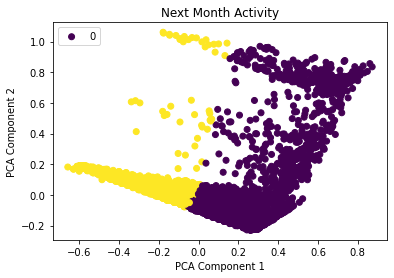

In [15]:
plt.scatter(X_proj[:,0], X_proj[:,1], c=df_train["Active"])
plt.title("Next Month Activity")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(["0", "1"], loc ="upper left")

In [16]:
op.countOf(df_train["Active"], 1)

4168

In [17]:
y = df_train["Active"]

In [18]:
df_train.drop("Active", inplace=True, axis=1)

In [19]:
df_train

,Personal,Theme,Discussion_day,comment_day,Participant_Type,Successful_Submission_Count,Comp_participation_day,FeatureA,FeatureB,FeatureC,...,Function_DE,Function_DM,Function_Bus,Function_AI,Function_ML,count_UA,Day_duration,FeatureX,FeatureY,User_sign-in_day
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000004,0.161290,0.0,0.333333,0.709677
1,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000008,0.048387,0.0,0.000000,0.903226
2,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000007,0.290323,0.0,0.000000,0.225806
3,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000007,0.322581,0.0,0.000000,0.193548
4,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000007,0.032258,0.0,0.333333,0.741935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9657,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000005,0.032258,0.0,0.000000,0.870968
9658,-1.0,0.0,0.0,0.0,1.0,0.0,0.258065,0.1250,0.0625,0.371429,...,0.0,0.0,0.0,0.0,0.0,0.000030,0.064516,0.0,0.333333,0.258065
9659,-1.0,0.0,0.0,0.0,1.0,0.0,0.935484,0.1875,0.0000,0.385714,...,0.0,0.0,0.0,0.0,0.0,0.000087,0.064516,0.0,1.000000,0.935484
9660,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.1250,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000008,0.032258,0.0,0.000000,0.967742


In [20]:
X_train, X_cv, y_train, y_cv = train_test_split(df_train, y, test_size=0.2, random_state=42)

In [21]:
X_train

,Personal,Theme,Discussion_day,comment_day,Participant_Type,Successful_Submission_Count,Comp_participation_day,FeatureA,FeatureB,FeatureC,...,Function_DE,Function_DM,Function_Bus,Function_AI,Function_ML,count_UA,Day_duration,FeatureX,FeatureY,User_sign-in_day
1840,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.062500,-0.028571,...,0.0,0.0,0.000000,0.0,0.0,0.000007,0.032258,0.0,0.000000,0.612903
8349,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.062500,-0.028571,...,0.0,0.0,0.000000,0.0,0.0,0.000008,0.032258,0.0,0.000000,0.838710
5563,-1.0,0.0,0.000000,0.0,1.0,0.0,0.612903,0.000,0.000000,0.057143,...,0.0,0.0,0.000000,0.0,0.0,0.000007,0.032258,0.0,0.333333,0.612903
8980,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.062500,-0.028571,...,0.0,0.0,0.000000,0.0,0.0,0.000009,0.032258,0.0,0.000000,0.967742
5226,1.0,0.0,0.774194,0.0,1.0,0.0,0.774194,0.125,0.000000,-0.028571,...,0.0,0.0,0.005208,0.0,0.0,0.000082,0.096774,0.0,0.000000,0.516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-1.0,0.0,0.000000,0.0,1.0,0.0,0.806452,0.125,0.875000,0.028571,...,0.0,0.0,0.000000,0.0,0.0,0.000007,0.032258,0.0,1.000000,0.806452
5191,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.062500,-0.028571,...,0.0,0.0,0.000000,0.0,0.0,0.000008,0.032258,0.0,0.000000,0.032258
5390,-1.0,0.0,0.000000,0.0,1.0,0.0,0.709677,0.125,0.000000,1.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000009,0.129032,0.0,0.000000,0.709677
860,-1.0,0.0,0.000000,0.0,1.0,0.0,0.129032,0.125,0.604167,0.123810,...,0.0,0.0,0.000000,0.0,0.0,0.000094,0.677419,0.0,1.000000,0.096774


In [22]:
X_cv

,Personal,Theme,Discussion_day,comment_day,Participant_Type,Successful_Submission_Count,Comp_participation_day,FeatureA,FeatureB,FeatureC,...,Function_DE,Function_DM,Function_Bus,Function_AI,Function_ML,count_UA,Day_duration,FeatureX,FeatureY,User_sign-in_day
7017,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.032258,0.0,0.000000,0.612903
5937,0.0,0.6,0.225806,0.0,1.0,0.0,0.225806,0.125,0.0000,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000041,0.064516,1.0,0.000000,0.225806
6264,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000024,0.080645,0.0,0.333333,0.870968
1569,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000030,0.064516,0.0,0.000000,0.709677
7275,-1.0,0.0,0.000000,0.0,1.0,0.0,0.774194,0.125,0.8750,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000012,0.290323,0.0,0.333333,0.645161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.032258,0.0,0.333333,0.903226
6393,-1.0,0.0,0.000000,0.0,1.0,0.0,0.483871,0.125,1.0000,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.000018,0.032258,0.0,0.000000,0.483871
3780,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000005,0.032258,0.0,0.000000,0.548387
8248,-1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,0.000005,0.032258,0.0,0.333333,0.935484


## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
start = time.time()
clf = LogisticRegression(random_state=0, max_iter=50).fit(X_train, y_train)
end = time.time()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
y_cvp = clf.predict(X_cv)

In [26]:
accuracy_score(y_cv, y_cvp)

0.9943093636833937

In [27]:
f1_score(y_cv, y_cvp)

0.9932556713672595

In [28]:
print(end - start)

0.07410669326782227


In [29]:
op.countOf(y_cvp, 1)

815

## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
start = time.time()
neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
end = time.time()

In [32]:
y_pred = neigh.predict(X_cv)

In [33]:
accuracy_score(y_cv, y_pred)

0.9384376616658044

In [34]:
f1_score(y_cv, y_pred)

0.9262244265344078

In [35]:
print(end - start)

0.006563663482666016


In [36]:
op.countOf(y_pred, 1)

797

## SVM

In [37]:
from sklearn.svm import SVC

In [38]:
start = time.time()
clf1 = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)
end = time.time()

In [39]:
y_cvp1 = clf1.predict(X_cv)

In [40]:
accuracy_score(y_cv, y_cvp1)

0.9849974133471289

In [41]:
f1_score(y_cv, y_cvp1)

0.9821538461538462

In [42]:
print(end - start)

1.0215938091278076


In [43]:
op.countOf(y_cvp1, 1)

809

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf2 = RandomForestClassifier(n_estimators=15).fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 2000, num = 10)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = clf2, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [45]:
start = time.time()
clf2 = RandomForestClassifier(n_estimators=506, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=90).fit(X_train, y_train)
end = time.time()

In [46]:
y_cvp2 = clf2.predict(X_cv)

In [47]:
accuracy_score(y_cv, y_cvp2)

0.9927573719606829

In [48]:
f1_score(y_cv, y_cvp2)

0.9914320685434517

In [49]:
print(end - start)

2.8417868614196777


In [50]:
op.countOf(y_cvp2, 1)

818

### Test data

In [51]:
df_test = pd.read_csv("test.csv")

In [52]:
df_test.shape

(1340, 66)

In [53]:
user_ids = df_test["User_ID"]

In [54]:
df_test.drop("Unnamed: 0", axis = 1, inplace=True)

In [55]:
df_test.drop("User_ID", axis = 1, inplace=True)

In [56]:
df_test.drop("Active", axis = 1, inplace=True)

In [57]:
df_test

,Personal,Theme,Discussion_day,comment_day,Participant_Type,Successful_Submission_Count,Comp_participation_day,FeatureA,FeatureB,FeatureC,...,Function_DE,Function_DM,Function_Bus,Function_AI,Function_ML,count_UA,Day_duration,FeatureX,FeatureY,User_sign-in_day
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,6.513839e-07,0.032258,0.0,1.000000,0.774194
1,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,6.513839e-07,0.032258,0.0,0.000000,0.870968
2,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,6.513839e-06,0.032258,0.0,0.333333,0.419355
3,-1.0,0.0,0.0,0.0,1.0,0.0,0.741935,0.125,0.8750,0.028571,...,0.0,0.0,0.0,0.0,0.0,6.513839e-07,0.032258,0.0,0.000000,0.741935
4,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,3.256919e-06,0.032258,0.0,0.333333,0.612903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,1.563321e-05,0.032258,0.0,0.000000,0.387097
1336,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,1.237629e-05,0.258065,0.0,0.000000,0.419355
1337,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.125,-0.0625,-0.028571,...,0.0,0.0,0.0,0.0,0.0,3.256919e-06,0.032258,0.0,0.000000,0.483871
1338,-1.0,0.0,0.0,0.0,1.0,0.0,0.225806,0.625,0.9375,0.285714,...,0.0,0.0,0.0,0.0,0.0,1.563321e-05,0.451613,0.0,0.333333,0.225806


In [58]:
y_pred = clf.predict(df_test)

In [59]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [60]:
op.countOf(y_pred, 1)

1146

In [61]:
result = pd.DataFrame(user_ids, columns=["User_ID"])

In [62]:
result["Active"] = y_pred

In [63]:
result["User_ID"] = result["User_ID"] + "_Month_5"

In [64]:
result

,User_ID,Active
0,ID_4TOXNBGB_Month_5,1
1,ID_CHFTIP26_Month_5,1
2,ID_FU5GMWLQ_Month_5,1
3,ID_254TVBQP_Month_5,1
4,ID_4ENO2VFE_Month_5,1
...,...,...
1335,ID_PI8N2KJX_Month_5,1
1336,ID_L9AHTUD7_Month_5,0
1337,ID_BB7GLV87_Month_5,1
1338,ID_WB6O1NFS_Month_5,0


In [65]:
result = result.rename(columns={"User_ID" : "User_ID_Next_month_Activity"})

In [66]:
result["Active"] = result["Active"].astype("int")

In [67]:
result["User_ID_Next_month_Activity"] = result["User_ID_Next_month_Activity"].astype("string")

In [69]:
result = result.set_index("User_ID_Next_month_Activity")

In [70]:
result

,Active
User_ID_Next_month_Activity,
ID_4TOXNBGB_Month_5,1
ID_CHFTIP26_Month_5,1
ID_FU5GMWLQ_Month_5,1
ID_254TVBQP_Month_5,1
ID_4ENO2VFE_Month_5,1
...,...
ID_PI8N2KJX_Month_5,1
ID_L9AHTUD7_Month_5,0
ID_BB7GLV87_Month_5,1


In [73]:
result.to_csv("sub.csv")

# Bias Variance

In [ ]:
x1 = np.array([0.008, 0.007, 0.007, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005])
y = np.array([0.2, 0.5, 0.8, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10])
x2 = np.array([0.001, 0.003, 0.005, 0.005, 0.006, 0.006, 0.006, 0.007, 0.007, 0.007, 0.007, 0.008, 0.008, 0.008])

In [ ]:
x1 = x1*100
x2 = x2*100

In [ ]:
x3 = np.square(x1) + x2

In [ ]:
x3

In [ ]:
plt.plot(x1, y)
plt.plot(x2, y)
plt.plot(x3, y)
plt.title("Bias Variance Tradeoff")
plt.xlabel("C values")
plt.ylabel("Error")